In [210]:
import os
import numpy as np
import random
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

# Data Split

In [6]:
rename = {
    'Baboon_': 'Baboon',
    'Elephant_': 'Elephant',
    'Honey_badger_': 'Honey_badger',
    'Honey_Badger': 'Honey_badger',
    'Mongoose_larger_gray': 'Mongoose_larger_grey',
    'Hippopotamus': 'Hippo'
}

In [218]:
seas_min_all_count = {1: 70, 2: 25}
seas_min_test_count = {1: 50, 2: 20}
root = '/home/zhmiao/datasets/ecology/Mozambique/'
season = 2
data_list_ori = os.path.join(root, 'SplitLists', 'Mozambique_season_{}_all.txt.ori'.format(season))

In [222]:
file_list = []
label_list = []
sec_list = []

with open(data_list_ori, 'r') as f:
    
    for line in tqdm(f):
        
        line = line.replace('  ', ' ')
        
        if 'Honey Badger' in line:
            line = line.replace('Honey Badger', 'Honey_badger')
            
        if 'Mongoose_white tailed' in line:
            line = line.replace('Mongoose_white tailed', 'Mongoose_white_tailed')
            
        line_sp = line.split(' ')
        file = line_sp[0]
        label = line_sp[1]
        sec = line_sp[2]
        
        if file.split('/')[1] in rename.keys():
            file_sp = file.split('/')
            file_sp[1] = rename[file_sp[1]]
            file = '/'.join(file_sp)
            
        file_list.append(file)
        label_list.append(label)
        sec_list.append(float(sec.replace('\n', '')))
        #if os.path.exists(os.path.join(root, file)):
        #    file_list.append(file)
        #    label_list.append(label)
        
file_list = np.array(file_list)
label_list = np.array(label_list)
sec_list = np.array(sec_list)


0it [00:00, ?it/s]
47494it [00:00, 474931.39it/s]
94865it [00:00, 474562.07it/s]
142076it [00:00, 473822.55it/s]
187182it [00:00, 466754.22it/s]
235783it [00:00, 472365.99it/s]
281806it [00:00, 468657.63it/s]
323582it [00:00, 469322.47it/s]

In [223]:
unique_labels, label_counts = np.unique(label_list, return_counts=True)

In [224]:
list(unique_labels)

['Aardvark',
 'Baboon',
 'Bat',
 'Bird_other',
 'Buffalo',
 'Bushbaby',
 'Bushbuck',
 'Bushpig',
 'Civet',
 'Duiker_common',
 'Duiker_red',
 'Duiker_unknown',
 'Eland',
 'Elephant',
 'Fire',
 'Genet',
 'Ghost',
 'Ground_hornbill',
 'Guineafowl_crested',
 'Guineafowl_helmeted',
 'Hare',
 'Hartebeest',
 'Hippo',
 'Hippopotamus',
 'Honey_badger',
 'Hornbill_ground',
 'Human',
 'Impala',
 'Kudu',
 'Lion',
 'Mongoose_banded',
 'Mongoose_bushy_tailed',
 'Mongoose_dwarf',
 'Mongoose_large_grey',
 'Mongoose_marsh',
 'Mongoose_slender',
 'Mongoose_unknown',
 'Mongoose_white_tailed',
 'Monitor_lizard',
 'Nyala',
 'Oribi',
 'Pangolin',
 'Porcupine',
 'Reedbuck',
 'Reptile',
 'Rodent',
 'Sable_antelope',
 'Samango',
 'Serval',
 'Setup',
 'Unknown',
 'Unknown_antelope',
 'Vervet',
 'Warthog',
 'Waterbuck',
 'Wildebeest']

Ghost


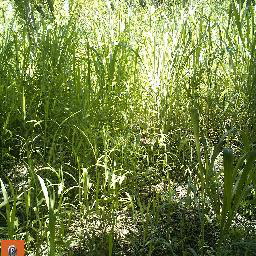

In [225]:
i = 30000
print(label_list[i])
Image.open(os.path.join(root, file_list[i]))

In [226]:
min_count = seas_min_all_count[season]
cat_sel = [(cat, count)
           for cat, count in zip(unique_labels[label_counts > min_count], label_counts[label_counts > min_count]) 
           if 'nknown' not in cat
           and 'other' not in cat
           and cat not in ['Ghost', 'Human', 'Fire', 'Setup', 'Rodent']]
sorted(cat_sel, key=lambda x : x[1], reverse=True)

[('Waterbuck', 34179),
 ('Baboon', 24161),
 ('Warthog', 20749),
 ('Impala', 10023),
 ('Bushbuck', 9955),
 ('Elephant', 3414),
 ('Oribi', 2377),
 ('Nyala', 1934),
 ('Genet', 1807),
 ('Bushpig', 1308),
 ('Reedbuck', 1040),
 ('Vervet', 787),
 ('Duiker_red', 769),
 ('Civet', 758),
 ('Buffalo', 749),
 ('Kudu', 670),
 ('Sable_antelope', 519),
 ('Porcupine', 506),
 ('Guineafowl_helmeted', 401),
 ('Hartebeest', 389),
 ('Wildebeest', 250),
 ('Mongoose_marsh', 144),
 ('Aardvark', 117),
 ('Honey_badger', 107),
 ('Hornbill_ground', 106),
 ('Mongoose_bushy_tailed', 59),
 ('Hare', 46),
 ('Mongoose_banded', 44),
 ('Mongoose_slender', 44),
 ('Mongoose_large_grey', 35),
 ('Mongoose_white_tailed', 31),
 ('Bushbaby', 29)]

In [227]:
tr_list = open(os.path.join(root, 'SplitLists', 'train_season_{}.txt'.format(season)), 'w')
te_list = open(os.path.join(root, 'SplitLists', 'test_season_{}.txt'.format(season)), 'w')

for c in range(len(cat_sel)):

    cat = cat_sel[c][0]
    random.seed(cat_sel[c][1])
    
    file_sel = file_list[label_list == cat]
    label_sel = label_list[label_list == cat]
    sec_sel = sec_list[label_list == cat]
    
    index_group = []
    
    last_sec = 0.
    same_shoot_index = [] 
    
    for index, sec in enumerate(sec_sel):
        if len(same_shoot_index) == 0:
            same_shoot_index.append(index)
        else:
            if (sec - last_sec) < 2:
                same_shoot_index.append(index)
            else:
                index_group.append(same_shoot_index)
                same_shoot_index = [index] 
        last_sec = sec
        
    if len(same_shoot_index) > 0:
        index_group.append(same_shoot_index)
    
    random.shuffle(index_group)
    index_rand = np.array([i for g in index_group for i in g])
    
    split_ratio = 0.1
    test_counts = int(split_ratio * len(file_sel))
    
    if test_counts < seas_min_test_count[season]:
        test_counts = seas_min_test_count[season]
        
    file_sel_te = file_sel[:test_counts]
    file_sel_tr = file_sel[test_counts:]
    label_sel_te = label_sel[:test_counts]
    label_sel_tr = label_sel[test_counts:]
    
    for f, l in zip(file_sel_tr, label_sel_tr):
        tr_list.write(f + ' ' + l + '\n')
        
    for f, l in zip(file_sel_te, label_sel_te):
        te_list.write(f + ' ' + l + '\n')
    
    
tr_list.close()
te_list.close()

# CLass indexing

In [230]:
train_list_season1 = os.path.join(root, 'SplitLists', 'train_season_1.txt')
train_list_season2 = os.path.join(root, 'SplitLists', 'train_season_2.txt')

In [236]:
labels_seas_1 = []
with open(train_list_season1, 'r') as f:
    for line in f:
        labels_seas_1.append(line.split(' ')[1].replace('\n', ''))
        
labels_seas_2 = []
with open(train_list_season2, 'r') as f:
    for line in f:
        labels_seas_2.append(line.split(' ')[1].replace('\n', ''))

In [247]:
label_set_seas_1 = set(np.unique(labels_seas_1))
label_set_seas_2 = set(np.unique(labels_seas_2))

In [254]:
union_label_indices = {l:i for i, l in enumerate(np.unique(labels_seas_1))}

In [262]:
add_i = len(union_label_indices)
for add in list(label_set_seas_2 - label_set_seas_1):
    union_label_indices[add] = add_i
    add_i += 1

In [263]:
len(union_label_indices)

34

In [265]:
label_set_seas_1 - label_set_seas_2

{'Duiker_common', 'Samango'}

In [266]:
label_set_seas_2 - label_set_seas_1

{'Bushbaby'}

In [264]:
union_label_indices

{'Aardvark': 0,
 'Baboon': 1,
 'Buffalo': 2,
 'Bushbuck': 3,
 'Bushpig': 4,
 'Civet': 5,
 'Duiker_common': 6,
 'Duiker_red': 7,
 'Elephant': 8,
 'Genet': 9,
 'Guineafowl_helmeted': 10,
 'Hare': 11,
 'Hartebeest': 12,
 'Honey_badger': 13,
 'Hornbill_ground': 14,
 'Impala': 15,
 'Kudu': 16,
 'Mongoose_banded': 17,
 'Mongoose_bushy_tailed': 18,
 'Mongoose_large_grey': 19,
 'Mongoose_marsh': 20,
 'Mongoose_slender': 21,
 'Mongoose_white_tailed': 22,
 'Nyala': 23,
 'Oribi': 24,
 'Porcupine': 25,
 'Reedbuck': 26,
 'Sable_antelope': 27,
 'Samango': 28,
 'Vervet': 29,
 'Warthog': 30,
 'Waterbuck': 31,
 'Wildebeest': 32,
 'Bushbaby': 33}